In [48]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima import auto_arima

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller

## Stock Price Data Analysis

In [49]:
# Define the stock ticker symbol
stock_symbol = 'AAPL'  # Example: Apple Inc.

# Fetch stock data
stock = yf.Ticker(stock_symbol)
df = stock.history(period="1y")  # Fetching data for the past 1 year
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-23 00:00:00-05:00,148.619295,150.986071,148.509906,150.230301,58301400,0.0,0.0
2022-11-25 00:00:00-05:00,147.485628,148.052467,146.302241,147.286743,35195900,0.0,0.0
2022-11-28 00:00:00-05:00,144.333250,145.824912,142.583038,143.418365,69246000,0.0,0.0
2022-11-29 00:00:00-05:00,143.487968,144.005082,139.569881,140.385315,83763800,0.0,0.0
2022-11-30 00:00:00-05:00,140.614031,147.893351,139.768765,147.207184,111380900,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-16 00:00:00-05:00,189.570007,190.960007,188.649994,189.710007,54412900,0.0,0.0
2023-11-17 00:00:00-05:00,190.250000,190.380005,188.570007,189.690002,50922700,0.0,0.0
2023-11-20 00:00:00-05:00,189.889999,191.910004,189.880005,191.449997,46505100,0.0,0.0


In [50]:
# Calculate moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200
Date,,,,,,,,,
2022-11-23 00:00:00-05:00,148.619295,150.986071,148.509906,150.230301,58301400,0.0,0.0,NaN,NaN
2022-11-25 00:00:00-05:00,147.485628,148.052467,146.302241,147.286743,35195900,0.0,0.0,NaN,NaN
2022-11-28 00:00:00-05:00,144.333250,145.824912,142.583038,143.418365,69246000,0.0,0.0,NaN,NaN
2022-11-29 00:00:00-05:00,143.487968,144.005082,139.569881,140.385315,83763800,0.0,0.0,NaN,NaN
2022-11-30 00:00:00-05:00,140.614031,147.893351,139.768765,147.207184,111380900,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-11-16 00:00:00-05:00,189.570007,190.960007,188.649994,189.710007,54412900,0.0,0.0,176.472779,172.932152
2023-11-17 00:00:00-05:00,190.250000,190.380005,188.570007,189.690002,50922700,0.0,0.0,176.707668,173.130694
2023-11-20 00:00:00-05:00,189.889999,191.910004,189.880005,191.449997,46505100,0.0,0.0,176.954188,173.319738


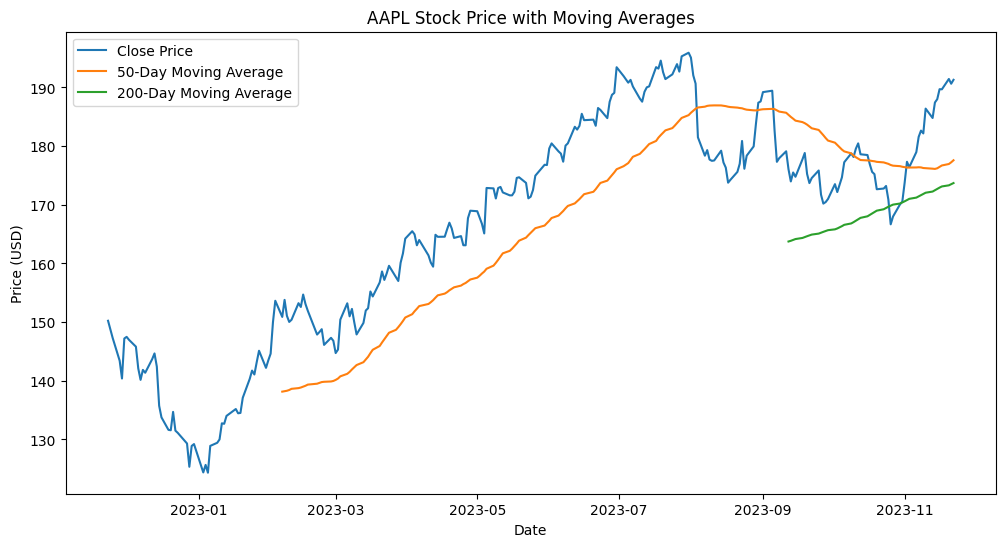

In [51]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-Day Moving Average')
plt.plot(df['MA200'], label='200-Day Moving Average')
plt.title(f"{stock_symbol} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## Predicting Stock Prices Using Linear Regression

In [52]:
# Prepare data for Linear Regression
df['Price'] = df['Close']
df['Prediction'] = df['Close'].shift(-30)  # Predicting 30 days into future
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Price,Prediction
Date,,,,,,,,,,,
2022-11-23 00:00:00-05:00,148.619295,150.986071,148.509906,150.230301,58301400,0.0,0.0,NaN,NaN,150.230301,129.426544
2022-11-25 00:00:00-05:00,147.485628,148.052467,146.302241,147.286743,35195900,0.0,0.0,NaN,NaN,147.286743,130.003326
2022-11-28 00:00:00-05:00,144.333250,145.824912,142.583038,143.418365,69246000,0.0,0.0,NaN,NaN,143.418365,132.748016
2022-11-29 00:00:00-05:00,143.487968,144.005082,139.569881,140.385315,83763800,0.0,0.0,NaN,NaN,140.385315,132.668442
2022-11-30 00:00:00-05:00,140.614031,147.893351,139.768765,147.207184,111380900,0.0,0.0,NaN,NaN,147.207184,134.010941
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16 00:00:00-05:00,189.570007,190.960007,188.649994,189.710007,54412900,0.0,0.0,176.472779,172.932152,189.710007,NaN
2023-11-17 00:00:00-05:00,190.250000,190.380005,188.570007,189.690002,50922700,0.0,0.0,176.707668,173.130694,189.690002,NaN
2023-11-20 00:00:00-05:00,189.889999,191.910004,189.880005,191.449997,46505100,0.0,0.0,176.954188,173.319738,191.449997,NaN


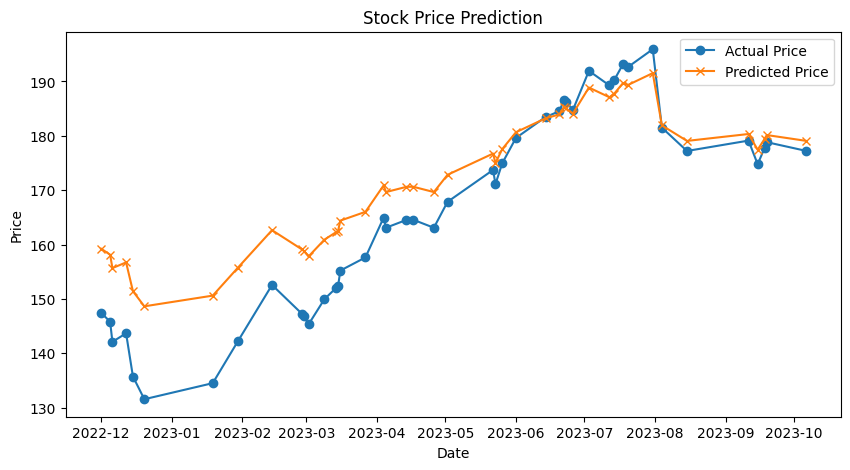

In [53]:
X = df[['Price']][:-30]  # all rows of the DataFrame except the last 30
y = df['Prediction'][:-30]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test = X_test.sort_index()

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and plot
predicted_prices = model.predict(X_test)
predicted_df = pd.DataFrame(predicted_prices, index=X_test.index, columns=['Predicted Price'])

plt.figure(figsize=(10, 5))
plt.plot(X_test['Price'], label='Actual Price', marker='o')
plt.plot(predicted_df['Predicted Price'], label='Predicted Price', marker='x')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Predicting Stock Prices Using ARIMA (AutoRegressive Integrated Moving Average)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1003.122, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=999.148, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=999.264, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=999.010, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=997.872, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=999.167, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.283 seconds


C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


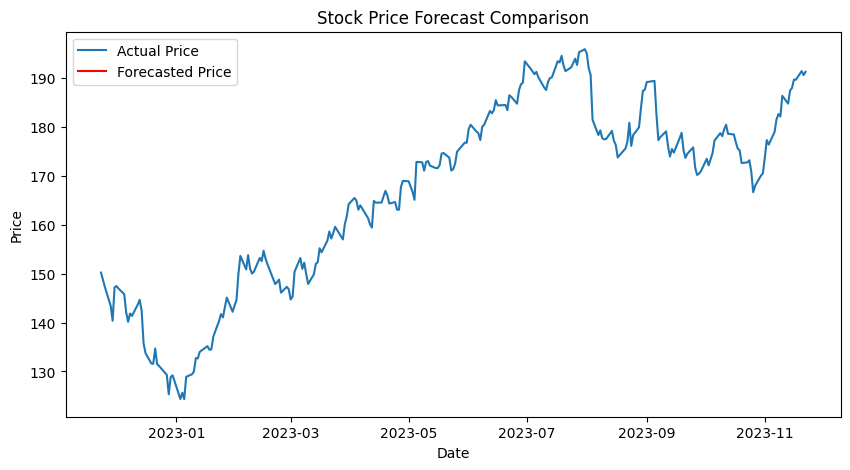

In [54]:
# Test for stationarity and apply differencing if necessary
# A time series is stationary if its statistical properties, such as mean, variance, and autocorrelation, are constant over time.
# Most time series models, including ARIMA, are built on the assumption that the data is stationary. 
# These models might produce unreliable or invalid results if this assumption is violated.
# result = adfuller(df['Price'])
# if result[1] > 0.05:  # p-value is greater than 0.05, data is non-stationary
#     df['Price'] = df['Price'].diff().dropna()  # Applying differencing

# Prepare the training data (excluding the most recent 30 days)
train_data = df['Price'][:-30]

# Fit the ARIMA model
model = auto_arima(train_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
model.fit(train_data)

# Forecast the next 30 days (which are the last 30 days in the actual dataset)
forecast = model.predict(n_periods=30)

# Check if forecast contains NaN
if pd.isna(forecast).any():
    raise ValueError("Forecast contains NaN values. Model fitting might have failed.")

# Create a DataFrame for the forecasted values
forecast_index = df.index[-30:]  # Use the last 30 days from the actual dataset
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Price'], label='Actual Price')
plt.plot(forecast_df['Forecast'], label='Forecasted Price', color='red')
plt.title('Stock Price Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [55]:
forecast_index

DatetimeIndex(['2023-10-12 00:00:00-04:00', '2023-10-13 00:00:00-04:00',
               '2023-10-16 00:00:00-04:00', '2023-10-17 00:00:00-04:00',
               '2023-10-18 00:00:00-04:00', '2023-10-19 00:00:00-04:00',
               '2023-10-20 00:00:00-04:00', '2023-10-23 00:00:00-04:00',
               '2023-10-24 00:00:00-04:00', '2023-10-25 00:00:00-04:00',
               '2023-10-26 00:00:00-04:00', '2023-10-27 00:00:00-04:00',
               '2023-10-30 00:00:00-04:00', '2023-10-31 00:00:00-04:00',
               '2023-11-01 00:00:00-04:00', '2023-11-02 00:00:00-04:00',
               '2023-11-03 00:00:00-04:00', '2023-11-06 00:00:00-05:00',
               '2023-11-07 00:00:00-05:00', '2023-11-08 00:00:00-05:00',
               '2023-11-09 00:00:00-05:00', '2023-11-10 00:00:00-05:00',
               '2023-11-13 00:00:00-05:00', '2023-11-14 00:00:00-05:00',
               '2023-11-15 00:00:00-05:00', '2023-11-16 00:00:00-05:00',
               '2023-11-17 00:00:00-05:00', '2023-1

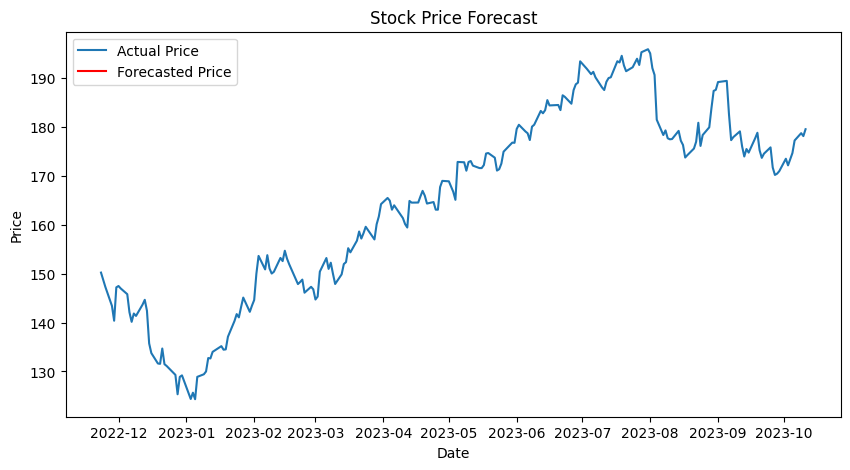

In [56]:
# Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=train_data.index[-1], periods=31)[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Actual Price')
plt.plot(forecast_df['Forecast'], label='Forecasted Price', color='red')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()